In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS

# from google.colab import files
# uploaded = files.upload()

In [16]:
df = pd.read_csv('data/raw_seoul.csv', index_col=['연번'])
df.shape

(21257, 9)

In [17]:
df.isnull().sum()

1소속부서        0
결제방법        39
구분       19778
대상인원         5
부서명          2
집행금액         1
집행목적        13
집행일시         2
집행장소         2
dtype: int64

In [18]:
df_na = df[df['집행일시'].isna()]
df.drop(df_na.index[0:2], inplace=True)

In [19]:
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day
df['시'] = df['집행일시'].dt.hour
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)

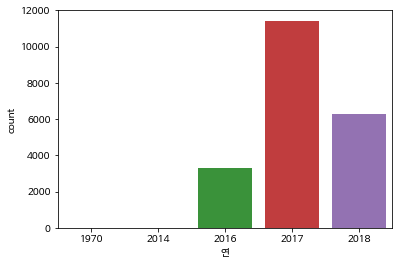

In [20]:
sns.countplot(data=df, x='연')

In [21]:
weekday_map = { 0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

In [22]:
df['요일_한글'] = df['요일'].apply(lambda x: weekday_map[x])

In [23]:
df['집행목적'] = df['집행목적'].fillna('')

In [24]:
spend_gubun= ' '.join(df['집행목적'])
spend_gubun[:100]

'시정 정책추진 자문 간담회 시정 청년 정책 의견수렴 간담회 시정 주요 경제정책 현안추진 의견수렴 간담회 시정종교계 의견수렴 간담회 시정 정책 추진 의견수렴 간담회 시정 정책 추진 '

In [25]:
def diaplyWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(
        font_path=fontpath,
        stopwords=STOPWORDS,
        background_color=backgroundcolor,
        width=width,
        height=height).generate(data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show

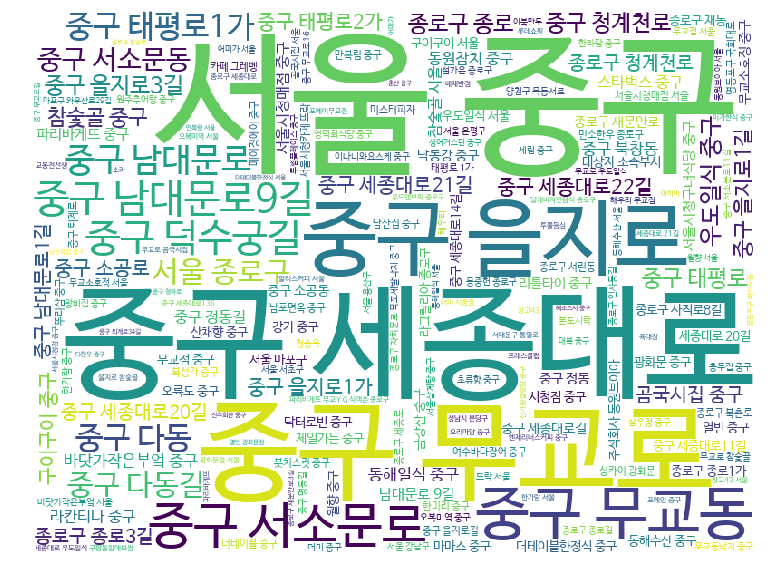

In [26]:
fontpath = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
diaplyWordCloud(' '.join(df['집행장소'].fillna('')))

In [29]:
#df['집행장소'].value_counts()
df['집행장소']=df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x: x.split('('))
df['상호명'].head()

연번
1      [동신참치양재직, 서초구 강남대로 213)]
2    [서울시청구내식당 ,  중구 세종대로 110)]
3               [한뫼촌, 종로구 북촌로)]
4      [서울시청구내식당, 중구 세종대로 110)]
5      [서울시청구내식당, 중구 세종대로 110)]
Name: 상호명, dtype: object

'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'